# Retraitement des données 

In [410]:
%reset -f

In [411]:
import numpy as np
import pandas as pd
import ast
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

In [412]:
N = len(pd.read_csv("../../data/case_1_spatial.csv"))
step_count = len(pd.read_csv("../../data/case_1_temporal.csv"))

print(N, step_count)

500 150


In [413]:
e = np.empty(shape=(step_count, N), dtype=float)
f = np.empty(shape=(step_count, N), dtype=float)
t = np.empty(shape=(step_count, N), dtype=float)
tr = np.empty(shape=(step_count, N), dtype=float)

for i in range(step_count):
# for i in range(1): 
    file_name = "../../data/anim/animation." + str(i) + ".csv";
    df = pd.read_csv(file_name)
    e[i] = np.array(df['E'])
    f[i] = np.array(df['F'])
    t[i] = np.array(df['T'])
    tr[i] = np.array(df['Tr'])

    
x = np.array(df['x'])
rho = np.array(df['rho'])

# display(df)

In [414]:
%matplotlib nbagg

<IPython.core.display.Javascript object>


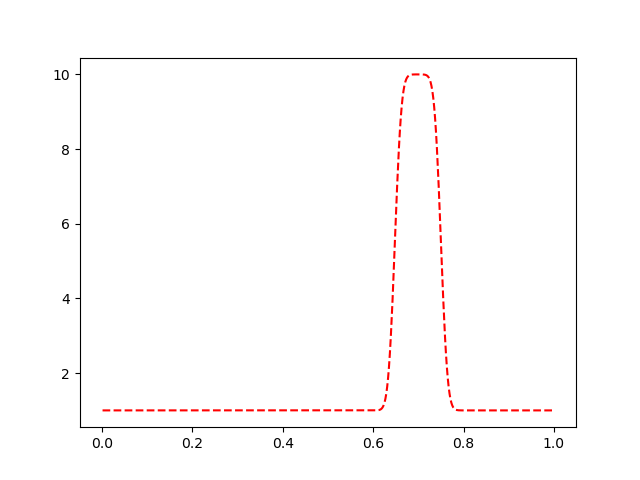

In [415]:
plt.plot(x, rho, 'r--')
plt.show()

<IPython.core.display.Javascript object>


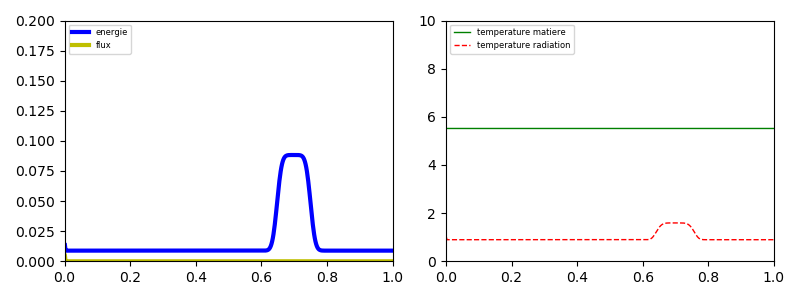

In [423]:
fig, axes = plt.subplots(1,2,figsize=(8,3))
ims   = []
im1   = [ax.plot([],[])[0] for ax in axes]
im2   = [ax.plot([],[])[0] for ax in axes]


# subplot 1 -  energy et flux
im1[0] = axes[0].plot([],[], 'b', label="energie", lw=3)[0]
im2[0] = axes[0].plot([],[], 'y-', label="flux", lw=3)[0]

axes[0].set_xlim([0, 1])
axes[0].set_ylim([0, 0.2])

# subplot 2 -  temperature matiere et radiative
im1[1] = axes[1].plot([],[], 'g-', label="temperature matiere", lw=1)[0]
im2[1] = axes[1].plot([],[], 'r--', label="temperature radiation", lw=1)[0]

axes[1].set_xlim([0, 1])
axes[1].set_ylim([0., 10])

legs = [ax.legend(loc=2, prop={'size': 6})  for ax in axes]

plt.tight_layout()

def update(i):
    # subplot 1
    im1[0].set_data(x, e[i])
    im2[0].set_data(x, f[i])

    # subplot 2
    im1[1].set_data(x, t[i])
    im2[1].set_data(x, tr[i])

    return im1 + im2

anim = FuncAnimation(fig, update, frames=step_count, interval=100, repeat=True, blit=True)
plt.show()

In [424]:
anim.save('creneau_10.mp4', writer = 'ffmpeg', fps = 15)

In [418]:
# # initializing a figure in which the graph will be plotted 
# fig = plt.figure()  
   
# # marking the x-axis and y-axis 
# axis = plt.axes(xlim =(0, 1), ylim =(-0.25, 0.75))  

# # initializing a line variable 
# line1, = axis.plot([], [], lw = 2)  
# line2, = axis.plot([], [], '--', lw = 1)
# line3, = axis.plot([], [], lw = 3)
   
# # data which the line will contain (x, y) 
# def init():  
#     line1.set_data([], [], label = 'line {}') 
# #     line2.set_data([], [])
#     line2.set_data([], []) 
# #     line3.set_data([], []) 
# #     return line1, line2, line3
#     return line1, line2
   
# def animate(i): 
#     line1.set_data(x, e[i])
# #     line2.set_data(x, rho)
#     line2.set_data(x, f[i]) 
# #     line3.set_data(x, t[i]) 
# #     return line1, line2, line3
#     return line1, line2
   
# anim = FuncAnimation(fig, animate, init_func=init, frames=step_count, interval=10, repeat=False, blit=True) 

# plt.show()

In [419]:
# fig = plt.figure()  
   
# axis = plt.axes(xlim =(0, 1), ylim =(1., 2.75))  
  
# line1, = axis.plot([], [], lw = 2)  
# line2, = axis.plot([], [], '--', lw = 1)
   
# def init():  
#     line1.set_data([], []) 
#     line2.set_data([], []) 
#     return line1, line2
   
# def animate(i): 
#     line1.set_data(x, t[i])
#     line2.set_data(x, tr[i]) 
#     return line1, line2
   
# anim = FuncAnimation(fig, animate, init_func = init, frames = step_count, interval = 10, repeat=False, blit = True) 
# plt.show()